# 1. Import necesary Libraries

In [1]:
try:
    # Importar librerías necesarias
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    import warnings

    # Configure to ingnore warnings
    warnings.filterwarnings('ignore')

    # Chart style settings
    sns.set(style='whitegrid')

    print("All libraries were imported successfully. :)")

except ModuleNotFoundError as e:
    print(f"Error: A necessary bookstore is missing -> {e}")
    print("Solution: Install the library with 'pip install library_name")
except Exception as e:
    print(f"Unexpected error: {e}")

All libraries were imported successfully. :)


# **2. Cleaning, Exploratory and Dataset Analysis**

## **Load Dataset**

In [2]:
try:
    # Load the dataset
    dataset_path = "/content/coffee_shop_revenue.csv"  # Update the path if needed
    df = pd.read_csv(dataset_path)

    # Display confirmation
    print("Dataset loaded successfully :)")


except FileNotFoundError:
    print(f"Error: The file '{dataset_path}' was not found.")
    print("Solution: Check the file path or ensure the file is uploaded correctly.")

except pd.errors.EmptyDataError:
    print(f"Error: The file '{dataset_path}' is empty.")
    print("Solution: Verify that the file contains data.")

except pd.errors.ParserError:
    print(f"Error: There was an issue parsing the file '{dataset_path}'.")
    print("Solution: Check if the file format is correct (CSV) and contains valid data.")

except Exception as e:
    print(f"Unexpected error: {e}")

df.head(5)

Dataset loaded successfully :)


Number_of_Customers_Per_Day  Average_Order_Value  Operating_Hours_Per_Day  \
0                          152                 6.74                       14   
1                          485                 4.50                       12   
2                          398                 9.09                        6   
3                          320                 8.48                       17   
4                          156                 7.44                       17   

   Number_of_Employees  Marketing_Spend_Per_Day  Location_Foot_Traffic  \
0                    4                   106.62                     97   
1                    8                    57.83                    744   
2                    6                    91.76                    636   
3                    4                   462.63                    770   
4                    2                   412.52                    232   

   Daily_Revenue  
0        1547.81  
1        2084.68  
2        3118.39  
3        2912.20  
4        1663.42

## **Understand The Dataset**

* **2.1 Identify the name of Columns and the data types**

In [3]:
# Print the name of the columns
print(df.columns)
print('---'*25)

# Print the variable type of data
print('Types of the variables:           Type: ')
print('---'*13)
print(df.dtypes)

Index(['Number_of_Customers_Per_Day', 'Average_Order_Value',
       'Operating_Hours_Per_Day', 'Number_of_Employees',
       'Marketing_Spend_Per_Day', 'Location_Foot_Traffic', 'Daily_Revenue'],
      dtype='object')
---------------------------------------------------------------------------
Types of the variables:           Type: 
---------------------------------------
Number_of_Customers_Per_Day      int64
Average_Order_Value            float64
Operating_Hours_Per_Day          int64
Number_of_Employees              int64
Marketing_Spend_Per_Day        float64
Location_Foot_Traffic            int64
Daily_Revenue                  float64
dtype: object


* **2.2 Know the info and shape of the data set**

In [4]:
# Print data info
print(df.info())

print('---'*20)

# Print the shape of the dataset
print('Shape of the Dataset: ', df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Number_of_Customers_Per_Day  2000 non-null   int64  
 1   Average_Order_Value          2000 non-null   float64
 2   Operating_Hours_Per_Day      2000 non-null   int64  
 3   Number_of_Employees          2000 non-null   int64  
 4   Marketing_Spend_Per_Day      2000 non-null   float64
 5   Location_Foot_Traffic        2000 non-null   int64  
 6   Daily_Revenue                2000 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 109.5 KB
None
------------------------------------------------------------
Shape of the Dataset:  (2000, 7)


**Highlights:**

> * Total entries: 2000, Index from 0 to 1999.
* Total colums: 7.
* Numbers of Non-Null values: 0.
* Types data: Float and Int.








* **2.3 Find Null Values for each variable**

In [5]:
# Count numbers of Null Values
print(df.isnull().sum())

Number_of_Customers_Per_Day    0
Average_Order_Value            0
Operating_Hours_Per_Day        0
Number_of_Employees            0
Marketing_Spend_Per_Day        0
Location_Foot_Traffic          0
Daily_Revenue                  0
dtype: int64


**Highlights:**
> Count Non-Null values: 0.

* **2.4 Find duplicated values**

In [6]:
# Find duplicated values
duplicates_values = df[df.duplicated()]
duplicates_values

Empty DataFrame
Columns: [Number_of_Customers_Per_Day, Average_Order_Value, Operating_Hours_Per_Day, Number_of_Employees, Marketing_Spend_Per_Day, Location_Foot_Traffic, Daily_Revenue]
Index: []

**Highlights:**
> * Duplicate values: 0 for each variables

# **3. Exploratory, Statisctic Analysis and Data Visualization**

* **3.1 Install Librarie For Create a Report About The Entire Dataset:**

In [7]:
try:
    # Attempt to install the library
    import subprocess
    subprocess.check_call(["pip", "install", "ydata-profiling"])

    # Attempt to import the library after installation
    from ydata_profiling import ProfileReport
    print("Library 'ydata-profiling' successfully installed and imported. :)")

except subprocess.CalledProcessError as e:
    print(f"Error installing 'ydata-profiling': {e}")

except ImportError as e:
    print(f"Error importing 'ydata-profiling': {e}")

except Exception as e:
    print(f"An unexpected error occurred: {e}")

Library 'ydata-profiling' successfully installed and imported. :)


* **3.2 Create the report of the DataFrame**

In [8]:
df_report = ProfileReport(df, explorative=True)
df_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

* **The report shows a basic statistic analysis for understand patters , relationships, variables distribution and others insights.**

**Highlights:**
> * Notice what the report shows 3 alerts about a stronge relatioships between variables that we will see later.

* **3.3 Applying describe funtion**

In [9]:
# Statistic Analysis
df.describe()

Number_of_Customers_Per_Day  Average_Order_Value  \
count                  2000.000000          2000.000000   
mean                    274.296000             6.261215   
std                     129.441933             2.175832   
min                      50.000000             2.500000   
25%                     164.000000             4.410000   
50%                     275.000000             6.300000   
75%                     386.000000             8.120000   
max                     499.000000            10.000000   

       Operating_Hours_Per_Day  Number_of_Employees  Marketing_Spend_Per_Day  \
count              2000.000000          2000.000000              2000.000000   
mean                 11.667000             7.947000               252.614160   
std                   3.438608             3.742218               141.136004   
min                   6.000000             2.000000                10.120000   
25%                   9.000000             5.000000               130.125000   
50%                  12.000000             8.000000               250.995000   
75%                  15.000000            11.000000               375.352500   
max                  17.000000            14.000000               499.740000   

       Location_Foot_Traffic  Daily_Revenue  
count            2000.000000    2000.000000  
mean              534.893500    1917.325940  
std               271.662295     976.202746  
min                50.000000     -58.950000  
25%               302.000000    1140.085000  
50%               540.000000    1770.775000  
75%               767.000000    2530.455000  
max               999.000000    5114.600000

**3.4 Change the size of memory for the values to fast processing**

In [10]:
# Change of the size of cells float64 to float16
#df[['Daily_Revenue','Marketing_Spend_Per_Day', 'Average_Order_Value']] = df[['Daily_Revenue','Marketing_Spend_Per_Day', 'Average_Order_Value']].astype('float16')

# Change of the size of cells int64 to int16
#df[['Number_of_Customers_Per_Day','Number_of_Employees','Operating_Hours_Per_Day', 'Location_Foot_Traffic']] = df[['Number_of_Customers_Per_Day','Number_of_Employees','Operating_Hours_Per_Day', 'Location_Foot_Traffic']].astype('int16')

# Comprobation about the size of the cells
#df.info()

### **3.5 Find Patterns and Visualization**

**3.5.1 Create a visualization to visualize correlation matrix between variables**

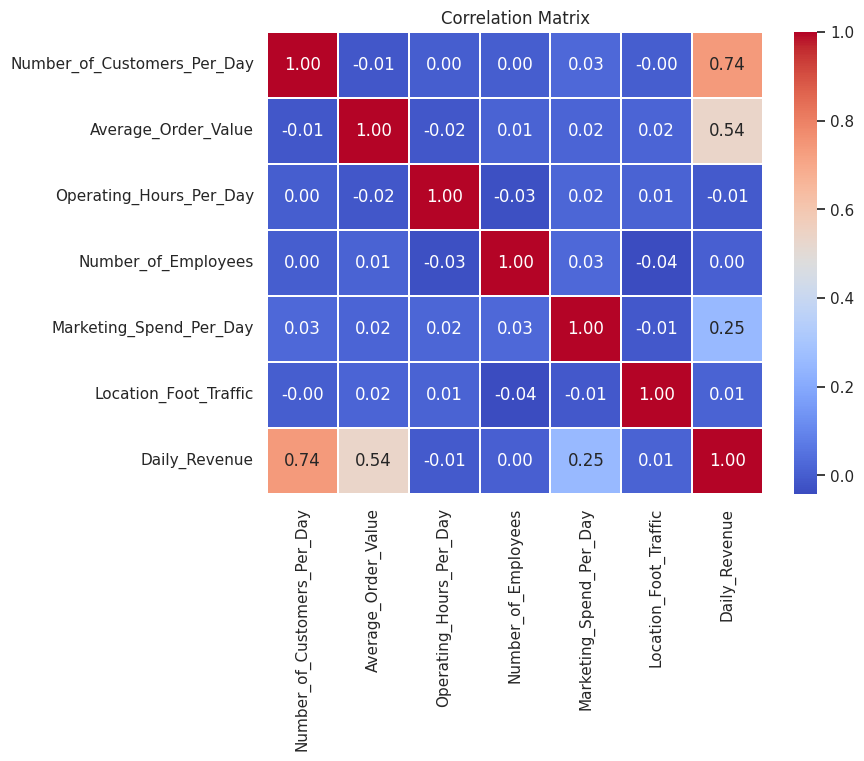

In [11]:
# Create a figure with size
plt.figure(figsize=(8, 6))

Correlation = df.corr()

# Create the correlation matrix
sns.heatmap(Correlation, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.2)
plt.title('Correlation Matrix')

# Show result
plt.show()

**Highlights:**
> * We can see warms colors in the values the contain a stronge relatioship

**3.5.2 List of the most relationships between 'Daily_Revenue' and others variables**




Factors Impacting Revenue:
 Daily_Revenue                  1.000000
Number_of_Customers_Per_Day    0.736461
Average_Order_Value            0.535694
Marketing_Spend_Per_Day        0.254812
Location_Foot_Traffic          0.013469
Number_of_Employees            0.003295
Operating_Hours_Per_Day       -0.005323
Name: Daily_Revenue, dtype: float64


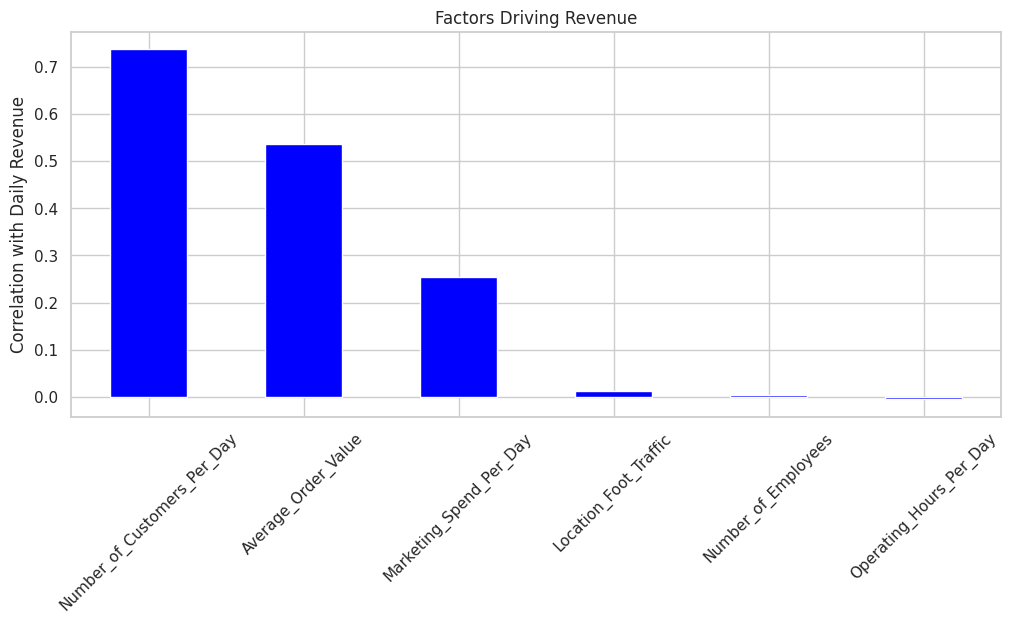

In [12]:
# Check correlation of all features with Daily Revenue
correlation_factors = df.corr()['Daily_Revenue'].sort_values(ascending=False)
print("Factors Impacting Revenue:\n", correlation_factors)

# Visualizing key drivers of revenue
plt.figure(figsize=(12, 5))
correlation_factors.drop('Daily_Revenue').plot(kind='bar', color='blue')
plt.title("Factors Driving Revenue")
plt.ylabel("Correlation with Daily Revenue")
plt.xticks(rotation=45)
plt.show()

**3.5.3 We can identify a stronge relationship between:**



- Number_of_Customers_Per_Day vs Daily_Revenue

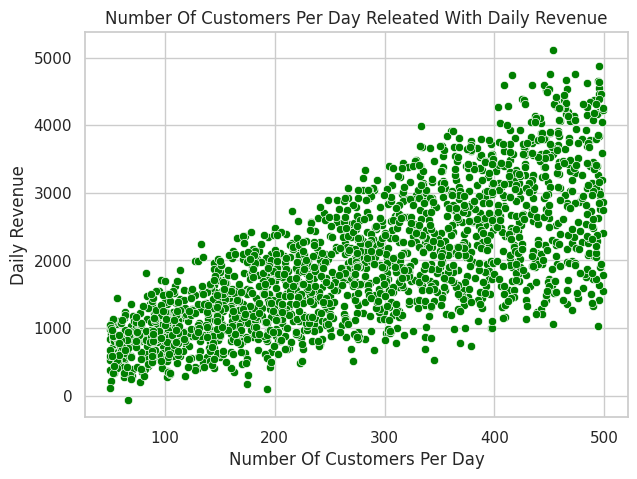

In [13]:
# Distribution of daily revenue
plt.figure(figsize=(7,5))

sns.scatterplot(x='Number_of_Customers_Per_Day', y='Daily_Revenue', data=df, color='green')

plt.title('Number Of Customers Per Day Releated With Daily Revenue')
plt.xlabel('Number Of Customers Per Day')
plt.ylabel('Daily Revenue')

plt.show()

- Averange_Order_Value vs Daily_Revenue

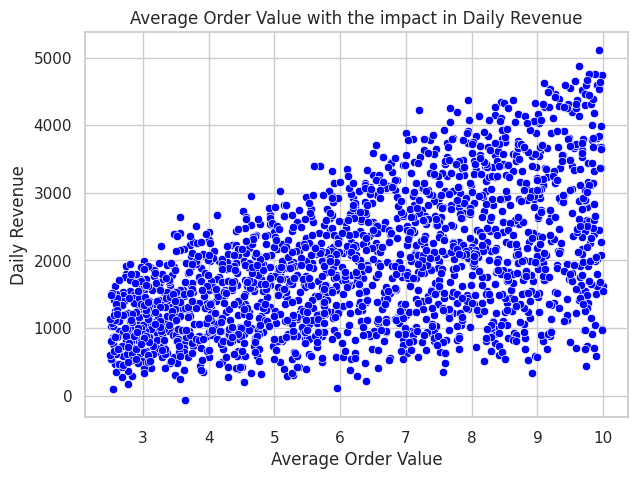

In [14]:
# Distribution of daily revenue
plt.figure(figsize=(7,5))

sns.scatterplot(x='Average_Order_Value', y='Daily_Revenue', data=df, color='blue')

plt.title('Average Order Value with the impact in Daily Revenue')
plt.xlabel('Average Order Value')
plt.ylabel('Daily Revenue')

plt.show()

- Marketing_Spend_Per_Day vs Daily_Revenue

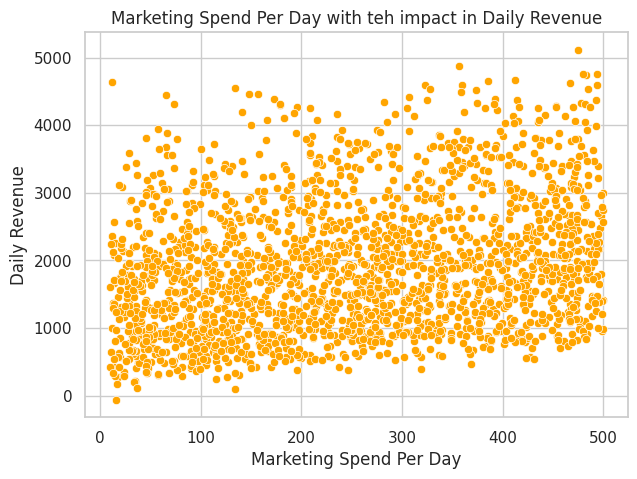

In [15]:
# Distribution of daily revenue
plt.figure(figsize=(7,5))

sns.scatterplot(x='Marketing_Spend_Per_Day', y='Daily_Revenue', data=df, color='orange')

plt.title('Marketing Spend Per Day with teh impact in Daily Revenue')
plt.xlabel('Marketing Spend Per Day')
plt.ylabel('Daily Revenue')

plt.show()

- Location Foot Traffic vs. Daily Revenue

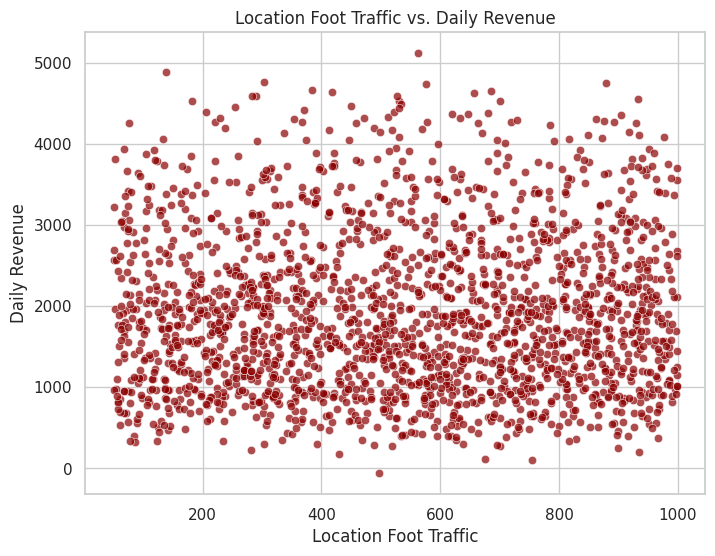

In [16]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Location_Foot_Traffic', y='Daily_Revenue', color='darkred', alpha=0.7)
plt.title('Location Foot Traffic vs. Daily Revenue')
plt.xlabel('Location Foot Traffic')
plt.ylabel('Daily Revenue')
plt.show()

* Putting all thogether for better visualization

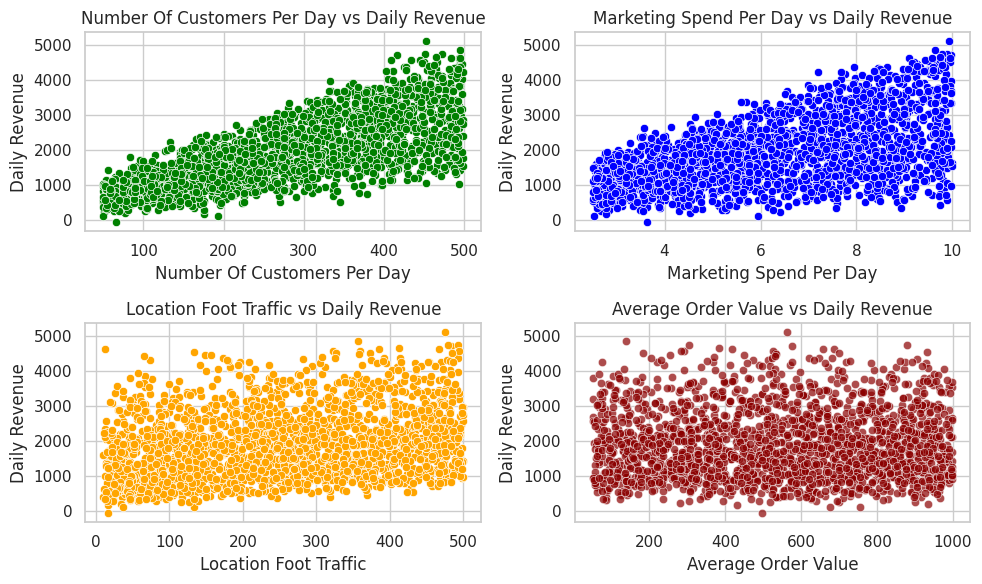

In [17]:
# Difine tha size of every chart
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

# Gráfico 1: Number of Customers vs Daily Revenue
sns.scatterplot(x='Number_of_Customers_Per_Day', y='Daily_Revenue', data=df, color='green', ax=axes[0, 0])
axes[0, 0].set_title('Number Of Customers Per Day vs Daily Revenue')
axes[0, 0].set_xlabel('Number Of Customers Per Day')
axes[0, 0].set_ylabel('Daily Revenue')

# Gráfico 2: Average Order Value vs Daily Revenue
sns.scatterplot(x='Average_Order_Value', y='Daily_Revenue', data=df, color='blue', ax=axes[0, 1])
axes[1, 1].set_title('Average Order Value vs Daily Revenue')
axes[1, 1].set_xlabel('Average Order Value')
axes[1, 1].set_ylabel('Daily Revenue')

# Gráfico 3: Marketing Spend vs Daily Revenue
sns.scatterplot(x='Marketing_Spend_Per_Day', y='Daily_Revenue', data=df, color='orange', ax=axes[1, 0])
axes[0, 1].set_title('Marketing Spend Per Day vs Daily Revenue')
axes[0, 1].set_xlabel('Marketing Spend Per Day')
axes[0, 1].set_ylabel('Daily Revenue')

# Gráfico 4: Location Foot Traffic vs Daily Revenue
sns.scatterplot(x='Location_Foot_Traffic', y='Daily_Revenue', data=df, color='darkred', alpha=0.7, ax=axes[1, 1])
axes[1, 0].set_title('Location Foot Traffic vs Daily Revenue')
axes[1, 0].set_xlabel('Location Foot Traffic')
axes[1, 0].set_ylabel('Daily Revenue')

# Ajustar diseño para mejor visualización
plt.tight_layout()
plt.show()


* Know about the level of correlation we have

In [18]:
# import Scipy Stats
from scipy.stats import pearsonr

# Select the top 4 most correlated variables
top_4_correlations = correlation_factors.head(4)

# Perform hypothesis testing for statistical significance
print("\n Hypothesis Testing (Pearson Correlation & p-value):")
for variable in top_4_correlations.index:
    correlation, p_value = pearsonr(df[variable], df['Daily_Revenue'])
    print(f"\n Variable: {variable}")
    print(f"Correlation: {correlation:.3f}")
    print(f"p-value: {p_value:.5f}")

    if p_value < 0.05:
        print(":) The correlation is statistically significant (p-value < 0.05).")
    else:
        print(":( No strong statistical evidence of correlation (p-value > 0.05).")


 Hypothesis Testing (Pearson Correlation & p-value):

 Variable: Daily_Revenue
Correlation: 1.000
p-value: 0.00000
:) The correlation is statistically significant (p-value < 0.05).

 Variable: Number_of_Customers_Per_Day
Correlation: 0.736
p-value: 0.00000
:) The correlation is statistically significant (p-value < 0.05).

 Variable: Average_Order_Value
Correlation: 0.536
p-value: 0.00000
:) The correlation is statistically significant (p-value < 0.05).

 Variable: Marketing_Spend_Per_Day
Correlation: 0.255
p-value: 0.00000
:) The correlation is statistically significant (p-value < 0.05).


## **3.6 Undertand distribution of variables**

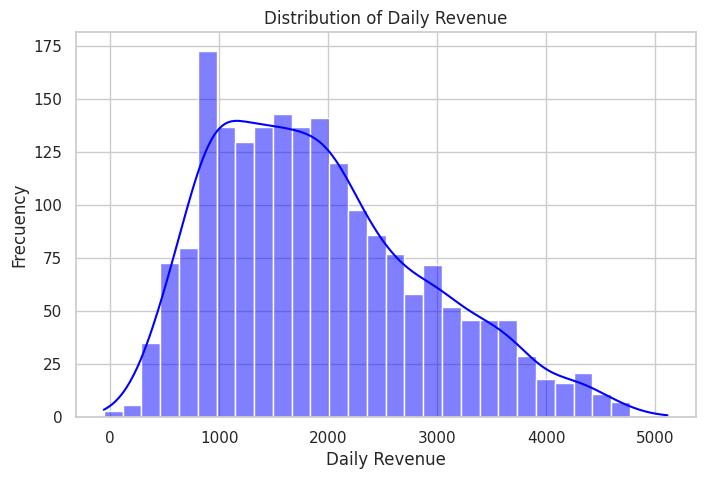

In [19]:
# Distribution of daily revenue
plt.figure(figsize=(8,5))

sns.histplot(df['Daily_Revenue'], bins=30, color='blue', kde=True)

plt.title('Distribution of Daily Revenue')
plt.xlabel('Daily Revenue')
plt.ylabel('Frecuency')

plt.show()

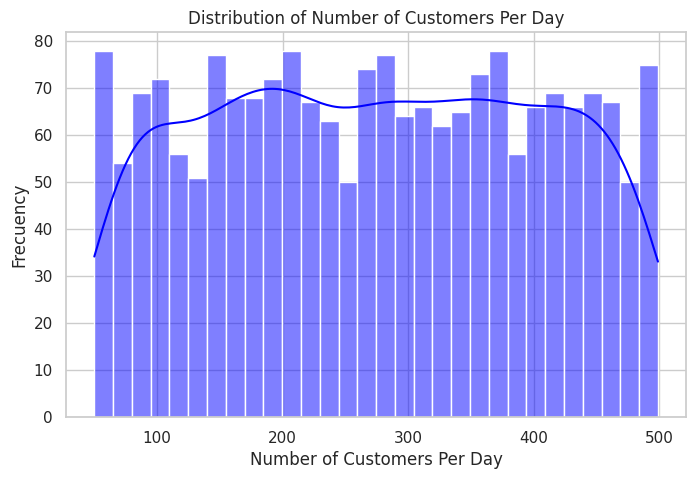

In [20]:
# Distribution of daily revenue
plt.figure(figsize=(8,5))

sns.histplot(df['Number_of_Customers_Per_Day'], bins=30, color='blue', kde=True)

plt.title('Distribution of Number of Customers Per Day')
plt.xlabel('Number of Customers Per Day')
plt.ylabel('Frecuency')

plt.show()

# **4. Context About The About The Business**

**4.1 Calculate total revenue**

In [21]:
total_revenue = df['Daily_Revenue'].sum()

print(f"Total Revenue: $ {total_revenue:.2f}")

Total Revenue: $ 3834651.88


**4.2 Average Revenue Per Customer**

In [22]:
avg_dr_nocpd = df['Daily_Revenue'] / df['Number_of_Customers_Per_Day']

avg_revenue_per_customer = avg_dr_nocpd.mean()

print(f"Average Revenue Per Customer: ${avg_revenue_per_customer:.2f}")

Average Revenue Per Customer: $7.60


**4.3 Averange dollar spent on marketing generate a daily revenue**

In [23]:
df["Marketing_ROI"] = df["Daily_Revenue"] / df["Marketing_Spend_Per_Day"]

print(df["Marketing_ROI"].describe())

count    2000.000000
mean       13.297609
std        20.394626
min        -3.625461
25%         4.640667
50%         7.508754
75%        13.191436
max       393.106870
Name: Marketing_ROI, dtype: float64


**Interpretation of Marketing ROI Results**
> * The Average of M-ROI: 13.29	On average, every 1 dollar spent on marketing generates $13.29 in revenue per day.

**Business Insights from Marketing ROI**

Marketing ROI varies significantly across stores:

> * Top 25% (Q3) marketing spend per day are performing well with ROI > 13.19.
* Focus on these high-performing strategies and replicate them in lower-performing days.
* Negative ROI (-3.63) means that they are spending on marketing but not generating enough revenue per day.



**Summary of Key Findings (General Conclusions)
Based on your analysis so far, you can summarize the following:**

Main insights from data:

> * Number of Customers Per Day is the strongest predictor of Daily Revenue (correlation: 0.73).
* Marketing Spend Per Day has a moderate impact on Daily Revenue (correlation: 0.25), suggesting that marketing campaigns need optimization.
* Order Value and Customer Count are the main profitability drivers.
* Potential outliers exist in revenue values, requiring further analysis.

# **5. Develop A Machine Learnng Model**

1. Import necessaries libraries.
2. Define features.
3. Split data.
4. Performe models.
5. Train and evaluate each model calculating performance metrics.
6. Display model comparison predicted results and metrics results.

In [24]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define features (X) and target variable (y)
X = df[['Number_of_Customers_Per_Day', 'Average_Order_Value', 'Marketing_Spend_Per_Day']]
y = df['Daily_Revenue']

# Split data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Support Vector Machine (SVR)": SVR(kernel='linear')
}

# Dictionary to store model evaluation metrics
model_results = {}

# Dictionary to store model predictions
predictions = {}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Store predictions
    predictions[model_name] = y_pred

    # Calculate performance metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Store results
    model_results[model_name] = {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R2 Score": r2
    }

# Convert predictions dictionary into a DataFrame
predictions_df = pd.DataFrame(predictions, index=y_test.index)
predictions_df["Actual"] = y_test  # Add actual values for comparison

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(model_results).T

# Display model comparison results
print("\n Model Performance Comparison:")
print(results_df)


 Model Performance Comparison:
                                     MAE           MSE        RMSE  R2 Score
Linear Regression             244.360611  97863.143603  312.830855  0.895263
Random Forest                 178.409319  47925.273166  218.918417  0.948708
Decision Tree                 259.249250  99240.999980  315.025396  0.893788
Gradient Boosting             176.376486  46527.530185  215.702411  0.950204
Support Vector Machine (SVR)  243.018003  97764.105002  312.672520  0.895369


**2. Display Predicted Data For Each Model**

In [25]:
# Display results
print("Predicted vs Actual Revenue:")

# Show first 10 rows for quick analysis
predictions_df.head()

Predicted vs Actual Revenue:


Linear Regression  Random Forest  Decision Tree  Gradient Boosting  \
1860        3135.686434      3373.2315        3419.10        3318.644695   
353         1324.537359      1229.2926        1368.30        1378.901691   
1333        2580.045391      2080.5384        1789.37        1971.440508   
905         2040.487105      2300.5427        2356.09        2133.723899   
1289        2260.123773      1660.0668        1998.36        1681.610632   

      Support Vector Machine (SVR)   Actual  
1860                   3139.215375  3443.69  
353                    1296.058508  1021.08  
1333                   2635.506363  2384.42  
905                    2037.105501  2198.35  
1289                   2195.914053  1988.89

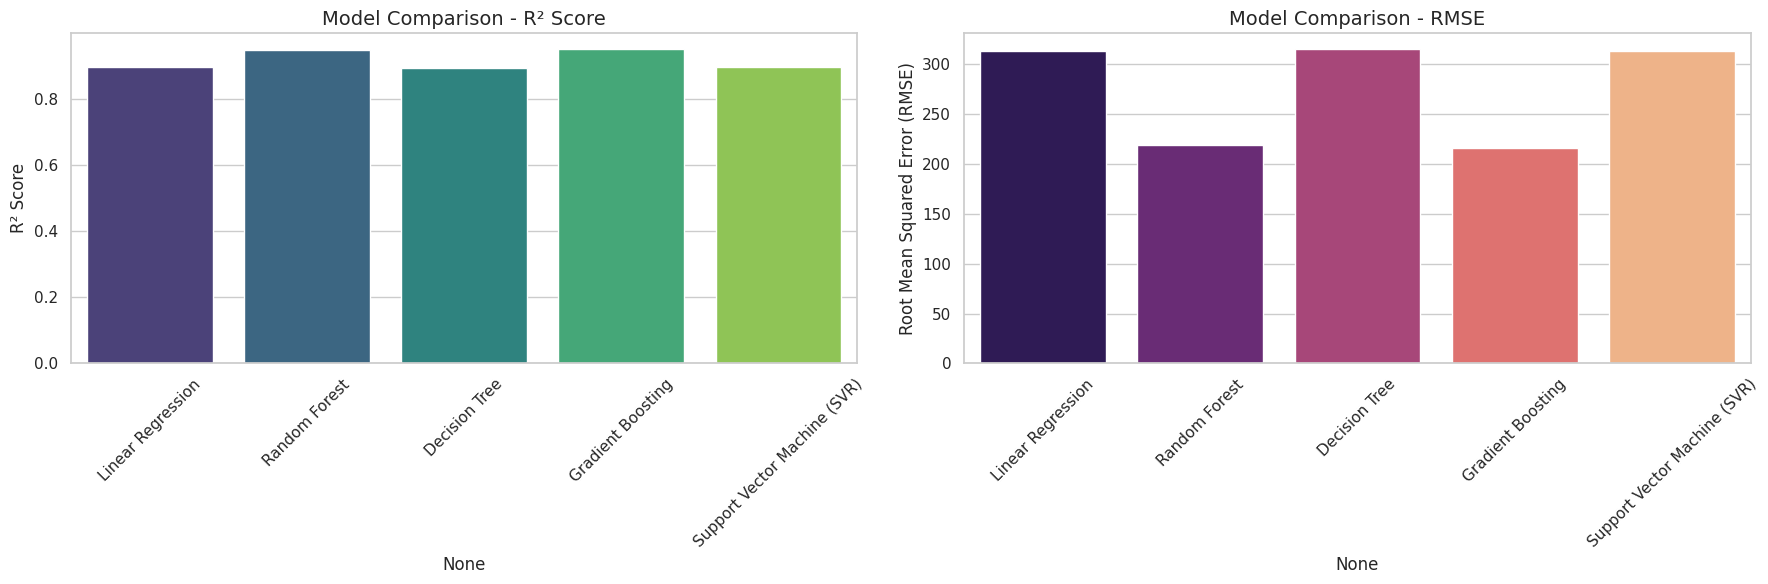

In [26]:
# Create a dashboard with tow plots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot R² Score Comparison
sns.barplot(ax=axes[0], x=results_df.index, y=results_df["R2 Score"], palette="viridis")
axes[0].set_title("Model Comparison - R² Score", fontsize=14)
axes[0].set_ylabel("R² Score")
axes[0].set_xticklabels(results_df.index, rotation=45)

# Plot RMSE Comparison
sns.barplot(ax=axes[1], x=results_df.index, y=results_df["RMSE"], palette="magma")
axes[1].set_title("Model Comparison - RMSE", fontsize=14)
axes[1].set_ylabel("Root Mean Squared Error (RMSE)")
axes[1].set_xticklabels(results_df.index, rotation=45)

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

## **5.1 Key Observations**

**5.1.1 Metric	Best Value	Meaning:**
* R^2 Score:	Closer to 1 is better:	Measures how well the model explains the target
* MAE: Lower is better:	Average absolute error (easy to interpret)
* MSE: Lower is better:	Penalizes large errors more than MAE
* RMSE: Lower is better:	Similar to MSE but easier to interpret


## **5.2 Conclusions and Results**

**Conclusion:**
> * Gradient Boosting is the Best Model as it delivers the best performance in all metrics we evaluated.

**Results:**

> * Highest R^2 Score: 0.950
* Lowest Mean Absolut Error Score: 176.376
* Lowest Mean Square Error Score: 46527.530
* Lowest Root Mean Square Error Score: 215.70

# **6. Bibliographic References**

> **Sarder, H. (2024). *Coffee Shop Daily Revenue Prediction Dataset* [Dataset]. Kaggle.**
**Available at:** https://www.kaggle.com/datasets/himelsarder/coffee-shop-daily-revenue-prediction-dataset/data


> **Knaflic, C. N. (2015). *Storytelling with data: A data visualization guide for business professionals.* Wiley.**